# Time Series Removing Trends And Decomposition

This file contains trend removal and decomposition methods with stock prices

In [1]:
import pandas as pd
from datetime import date
from datetime import timedelta
import plotly.graph_objects as go

import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import numpy as np
from IPython.display import clear_output
import time
# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

In [2]:
import platform
print(platform.python_version())

3.8.3


In [3]:
# Obtain the API credentials from an external hidden file

from passwords import api_key

In [4]:
# A function to obtain price history

#Utilizing "UniBit API" by Vincent Jiang
#Site: https://unibit.ai/product

#Errors may occur if credits run out, add an error code check to this function

def retrieve_ticker_price_info(ticker, start_date, end_date = False):
    
    # Obtain today's date
    today = date.today()
    
    # A condition to set the end date to today if there is no end date given
    if not end_date:
        end_date = today
    
    
    url = 'https://api.unibit.ai/v2/stock/historical/?tickers={}&interval=1&startDate={}&endDate={}&selectedFields=all&dataType=json&accessKey={}'.format(ticker, start_date, end_date, api_key)
    
    response = requests.get(url)
    
    if response.status_code != 200:
        print("The response status code is: " + str(response.status_code))
        return None
    
    return response.json()
    

In [5]:
def retrieve_price_history_dataframe(ticker, ticker_price_history):
    
    data_frame = pd.DataFrame(ticker_price_history['result_data'][ticker])
    
    # Set the index to the 'date' column
    data_frame.set_index('date', inplace = True)
    
    data_frame.sort_index(inplace=True)
    
    return data_frame

In [6]:
today = date.today()
a_year_ago = str(date.today() - timedelta(days=1*365))
three_years_ago = str(date.today() - timedelta(days=3*365))
five_years_ago = str(date.today() - timedelta(days=5*365))

In [7]:
# A test of the above functions with the 'DKS' company ticker

# Obtain the price info
dks_info = retrieve_ticker_price_info('DKS', a_year_ago)

# Create and view the dataframe
dks_df = retrieve_price_history_dataframe('DKS', dks_info)
dks_df.head()

volume   high    low  adj_close  close   open
date                                                      
2019-07-12  1746900  37.46  36.07      37.21  37.21  36.07
2019-07-15  1488200  37.77  37.02      37.74  37.74  37.21
2019-07-16  1823400  38.08  37.40      37.75  37.75  37.71
2019-07-17  1169800  38.00  37.35      37.92  37.92  37.92
2019-07-18  1395400  37.79  37.23      37.58  37.58  37.69

In [8]:
dks_info['meta_data']['start_date']
dks_info['meta_data']['end_date']
list(dks_info['result_data'].keys())[0]

'DKS'

In [9]:
def print_ohlc(ticker_df, ticker_info):
    
    ticker_n = list(ticker_info['result_data'].keys())[0]
    start_date = ticker_info['meta_data']['start_date']
    end_date = ticker_info['meta_data']['end_date']

    
    
    fig = go.Figure(data=go.Ohlc(x=ticker_df.index,
                    open=ticker_df['open'],
                    high=ticker_df['high'],
                    low=ticker_df['low'],
                    close=ticker_df['close']))

    fig.update_layout(title_text='{} From {} to {}'.format(ticker_n, start_date, end_date),
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, xaxis_title="Time", yaxis_title="Price")
    
    fig.show()

In [10]:
print_ohlc(dks_df, dks_info)

# Obtain S&P 500 Index Values and Create Transformations

In [11]:
# The S&P 500 company ticker is ^GSPC

# Obtain the price info
inx_info = retrieve_ticker_price_info('^GSPC', a_year_ago)

# Create and view the dataframe
inx_df = retrieve_price_history_dataframe('^GSPC', inx_info)
inx_df.head()

volume     high      low  adj_close    close     open
date                                                                 
2019-07-12  2974960000  3013.92  3001.87    3013.77  3013.77  3003.36
2019-07-15  2874970000  3017.80  3008.77    3014.30  3014.30  3017.80
2019-07-16  3290650000  3015.02  3001.15    3004.04  3004.04  3012.13
2019-07-17  3181600000  3005.26  2984.25    2984.42  2984.42  3005.10
2019-07-18  3296580000  2998.28  2973.09    2995.11  2995.11  2978.87

In [12]:
# View the S&P 500
print_ohlc(inx_df, inx_info)

In [13]:
inx_df.head()

volume     high      low  adj_close    close     open
date                                                                 
2019-07-12  2974960000  3013.92  3001.87    3013.77  3013.77  3003.36
2019-07-15  2874970000  3017.80  3008.77    3014.30  3014.30  3017.80
2019-07-16  3290650000  3015.02  3001.15    3004.04  3004.04  3012.13
2019-07-17  3181600000  3005.26  2984.25    2984.42  2984.42  3005.10
2019-07-18  3296580000  2998.28  2973.09    2995.11  2995.11  2978.87

In [14]:
# Create transformation columns of the adjusted close price

# Source: https://docs.scipy.org/doc/numpy/reference/routines.math.html

# Calculate the log of the adjusted close prices
inx_df['adj_close_log'] = np.log(inx_df['adj_close'])

# Calculate the square root of the adjusted close prices
inx_df['adj_close_sqrt'] = np.sqrt(inx_df['adj_close'])

# Calculate the cubed root of the adjusted close prices
inx_df['adj_close_cbrt'] = np.cbrt(inx_df['adj_close'])



In [15]:
inx_df.head()

volume     high      low  adj_close    close     open  \
date                                                                    
2019-07-12  2974960000  3013.92  3001.87    3013.77  3013.77  3003.36   
2019-07-15  2874970000  3017.80  3008.77    3014.30  3014.30  3017.80   
2019-07-16  3290650000  3015.02  3001.15    3004.04  3004.04  3012.13   
2019-07-17  3181600000  3005.26  2984.25    2984.42  2984.42  3005.10   
2019-07-18  3296580000  2998.28  2973.09    2995.11  2995.11  2978.87   

            adj_close_log  adj_close_sqrt  adj_close_cbrt  
date                                                       
2019-07-12       8.010947       54.897814       14.444528  
2019-07-15       8.011123       54.902641       14.445375  
2019-07-16       8.007713       54.809123       14.428967  
2019-07-17       8.001161       54.629845       14.397485  
2019-07-18       8.004736       54.727598       14.414655

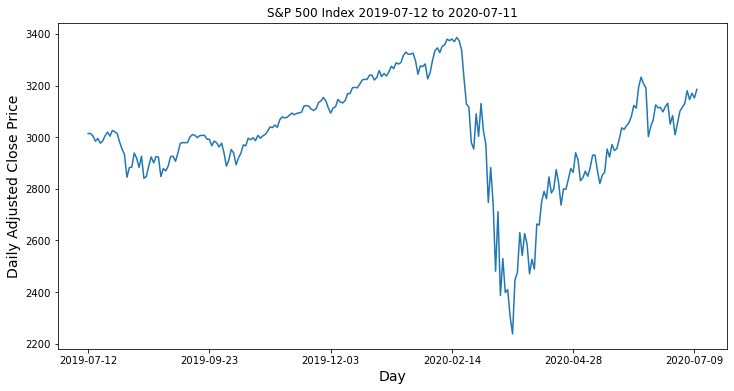

In [16]:
# Original Plot

inx_df['adj_close'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("Daily Adjusted Close Price", fontsize=14)
plt.title('S&P 500 Index {} to {}'.format(a_year_ago, today))
plt.show()

In [17]:
from stationarity_check_funtion import *

In [18]:
#https://github.com/statsmodels/statsmodels/issues/6150
#!pip install git+https://github.com/statsmodels/statsmodels.git --upgrade

In [19]:
# There appears to be an ongiong issue with stats models

#!python -m pip install statsmodels # Don't install as a root, create an environment

from statsmodels.tsa.stattools import adfuller

In [20]:
# The original adjusted close series dickey fuller test
stationarity_check(inx_df['adj_close'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.427252
p-value                          0.134192
#Lags Used                       9.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


# Removing Trends

## 1) Transformations

### A) Log Transformation

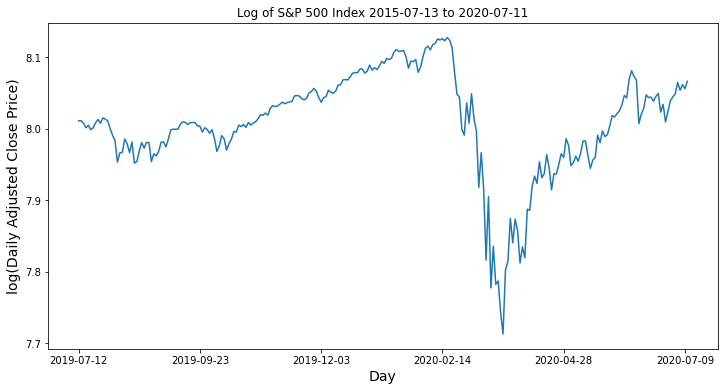

In [21]:
inx_df['adj_close_log'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("log(Daily Adjusted Close Price)", fontsize=14)
plt.title('Log of S&P 500 Index {} to {}'.format(five_years_ago, today))
plt.show()

In [22]:
stationarity_check(inx_df['adj_close_log'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.494054
p-value                          0.116928
#Lags Used                       9.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


### B) Square Root Transformation

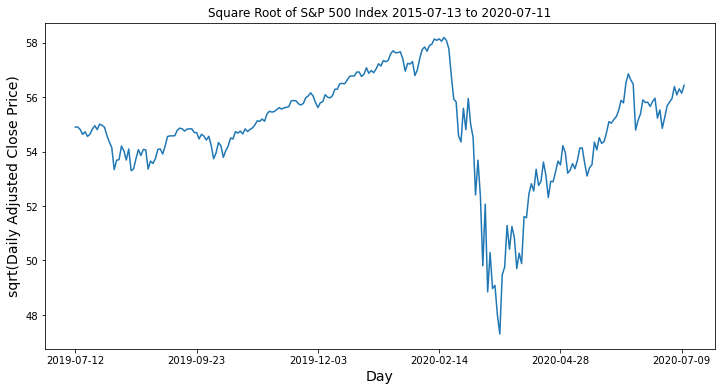

In [23]:
inx_df['adj_close_sqrt'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("sqrt(Daily Adjusted Close Price)", fontsize=14)
plt.title('Square Root of S&P 500 Index {} to {}'.format(five_years_ago, today))
plt.show()

In [24]:
stationarity_check(inx_df['adj_close_sqrt'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.461263
p-value                          0.125186
#Lags Used                       9.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


### C) Cubed Root Transformation

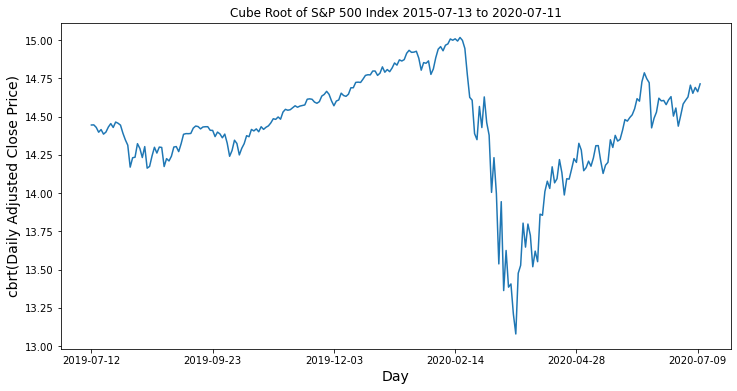

In [25]:
inx_df['adj_close_cbrt'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("cbrt(Daily Adjusted Close Price)", fontsize=14)
plt.title('Cube Root of S&P 500 Index {} to {}'.format(five_years_ago, today))
plt.show()

In [26]:
stationarity_check(inx_df['adj_close_cbrt'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.472351
p-value                          0.122347
#Lags Used                       9.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


## 2) Rolling Mean

NOTE: The lab removes the rolling mean after a transformation.

### A) Subtract the Rolling Mean

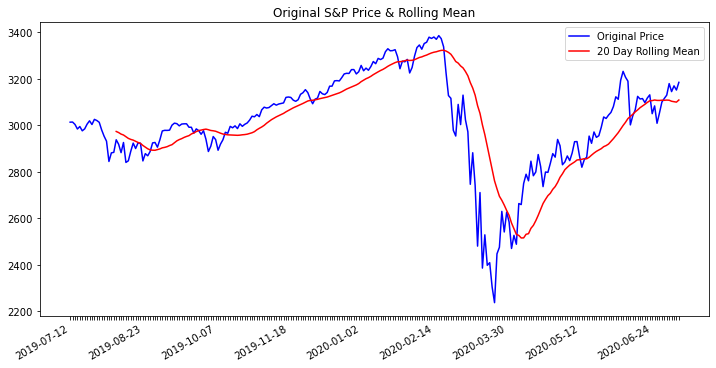

In [27]:
rolmean = inx_df['adj_close'].rolling(window = 20).mean()


fig, ax = plt.subplots(figsize=(12,6))

ax.plot(inx_df['adj_close'], color='blue',label='Original Price')
ax.plot(rolmean, color='red',label='20 Day Rolling Mean')

fig.autofmt_xdate()
ax.legend(loc='best')
plt.title('Original S&P Price & Rolling Mean')


#set cusom format of dates
ticklabels = inx_df.index
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#show only each 30th label, another are not visible
spacing = 30
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)


plt.show(block=False)

In [28]:
# Subtract the moving average from the original data and check head for Nans
data_minus_rolmean = inx_df['adj_close'] - rolmean
data_minus_rolmean[15:25]

date
2019-08-02         NaN
2019-08-05         NaN
2019-08-06         NaN
2019-08-07         NaN
2019-08-08    -35.7380
2019-08-09    -50.4220
2019-08-12    -79.7920
2019-08-13    -32.2860
2019-08-14   -110.8150
2019-08-15    -96.4395
Name: adj_close, dtype: float64

In [29]:
# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

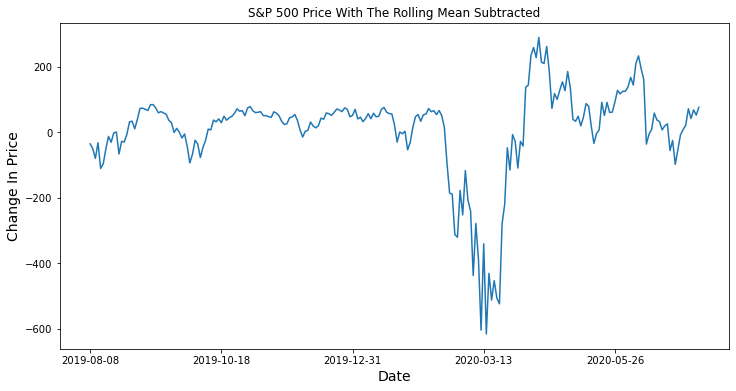

In [30]:
data_minus_rolmean.plot(figsize = (12,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Change In Price", fontsize=14)
plt.title('S&P 500 Price With The Rolling Mean Subtracted')
plt.show()

In [31]:
stationarity_check(data_minus_rolmean)

Results of Dickey-Fuller Test:
Test Statistic                  -3.565288
p-value                          0.006460
#Lags Used                       9.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


### B) Weighted Rolling Mean

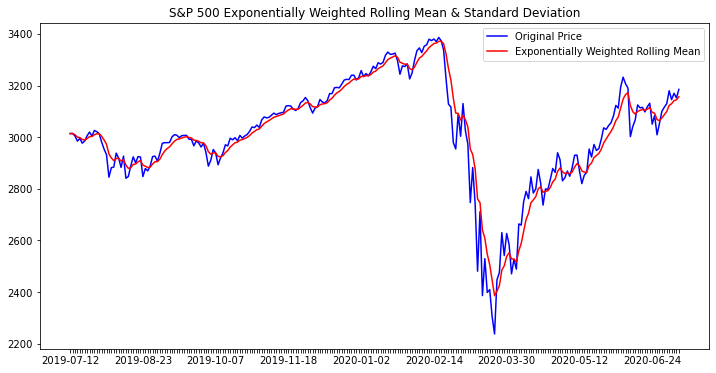

In [32]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = inx_df['adj_close'].ewm(halflife = 2).mean()

# Plot the original data with exp weighted average
fig, ax = plt.subplots(figsize=(12,6))
orig = plt.plot(inx_df['adj_close'], color='blue',label='Original Price')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')

plt.legend(loc='best')
plt.title('S&P 500 Exponentially Weighted Rolling Mean & Standard Deviation')

#set cusom format of dates
ticklabels = inx_df.index
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#show only each 30th label, another are not visible
spacing = 30
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)


plt.show(block=False)

In [33]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = inx_df['adj_close'] - exp_rolmean
data_minus_exp_rolmean.head(15)

date
2019-07-12     0.000000
2019-07-15     0.219533
2019-07-16    -5.491314
2019-07-17   -15.304736
2019-07-18    -2.972867
2019-07-19   -14.285144
2019-07-22    -3.980722
2019-07-23    11.317079
2019-07-24    17.621438
2019-07-25     1.207953
2019-07-26    16.389996
2019-07-29     8.078260
2019-07-30     0.202888
2019-07-31   -22.974462
2019-08-01   -35.128986
Name: adj_close, dtype: float64

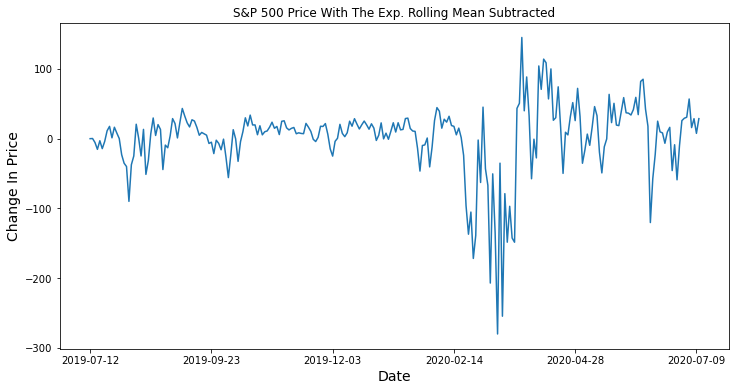

In [34]:
data_minus_exp_rolmean.plot(figsize = (12,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Change In Price", fontsize=14)
plt.title('S&P 500 Price With The Exp. Rolling Mean Subtracted')
plt.show()

In [35]:
stationarity_check(data_minus_exp_rolmean)

Results of Dickey-Fuller Test:
Test Statistic                  -3.432818
p-value                          0.009890
#Lags Used                       9.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


## 3) Differencing

In [36]:
data_diff = inx_df['adj_close'].diff(periods=1)
data_diff.head(10)

date
2019-07-12      NaN
2019-07-15     0.53
2019-07-16   -10.26
2019-07-17   -19.62
2019-07-18    10.69
2019-07-19   -18.50
2019-07-22     8.42
2019-07-23    20.44
2019-07-24    14.09
2019-07-25   -15.89
Name: adj_close, dtype: float64

In [37]:
data_diff.dropna(inplace=True)

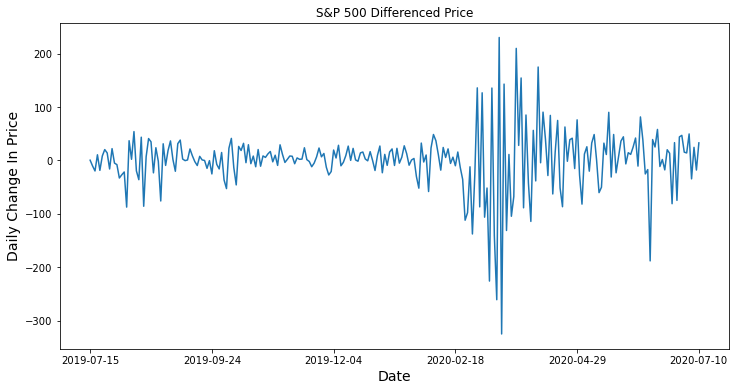

In [38]:
data_diff.plot(figsize = (12,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Daily Change In Price", fontsize=14)
plt.title('S&P 500 Differenced Price')
plt.show(block=False)

In [39]:
stationarity_check(data_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.915660
p-value                          0.001923
#Lags Used                       8.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


## 4) Time Series Decomposition

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
# The S&P 500 company ticker is ^GSPC

# Obtain the price info for the last three years
inx_info = retrieve_ticker_price_info('^GSPC', three_years_ago)

# Create and view the dataframe
inx_df = retrieve_price_history_dataframe('^GSPC', inx_info)
inx_df.head()

volume     high      low  adj_close    close     open
date                                                                 
2017-07-12  3171620000  2445.76  2435.75    2443.25  2443.25  2435.75
2017-07-13  3067670000  2449.32  2441.69    2447.83  2447.83  2444.99
2017-07-14  2736640000  2463.54  2446.69    2459.27  2459.27  2449.16
2017-07-17  2793170000  2462.82  2457.16    2459.14  2459.14  2459.50
2017-07-18  2962130000  2460.92  2450.34    2460.61  2460.61  2455.88

In [42]:
# Convert date index to datetime object
inx_df.index = pd.to_datetime(inx_df.index)

In [43]:
# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
# decomposition = seasonal_decompose(inx_df['adj_close'])

In [44]:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

## Old: print(pd.DatetimeIndex(inx_df['adj_close'], periods = 1).inferred_freq)
print(pd.DatetimeIndex(inx_df['adj_close']).inferred_freq)

None


## A) Additive Decomposition

### A.1) Frequency Set To 5 periods

In [45]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='additive', period = 5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

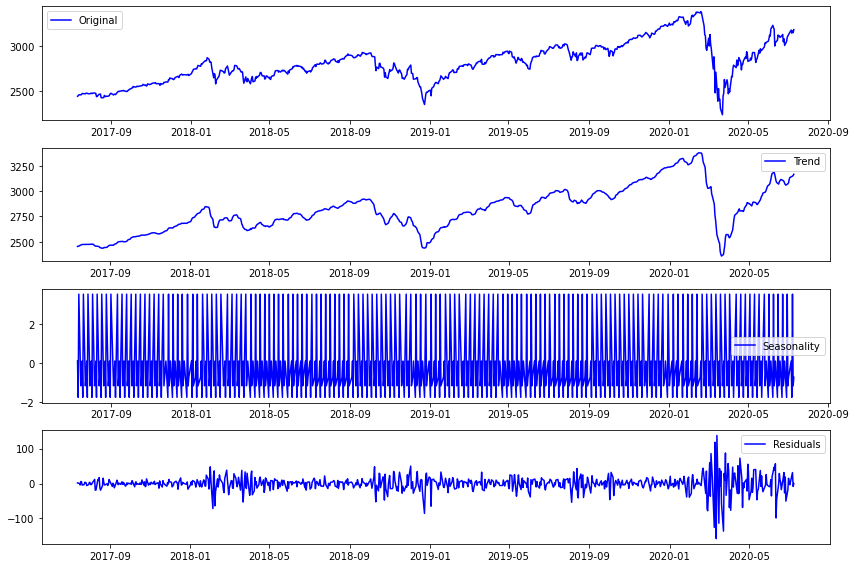

In [46]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [47]:
residual.dropna(inplace=True)

In [48]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.149748e+01
p-value                        4.576743e-21
#Lags Used                     1.400000e+01
Number of Observations Used    7.360000e+02
Critical Value (1%)           -3.439266e+00
Critical Value (5%)           -2.865475e+00
Critical Value (10%)          -2.568865e+00
dtype: float64


### A.2) Frequency Set To 20 periods

In [49]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='additive', period = 20)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

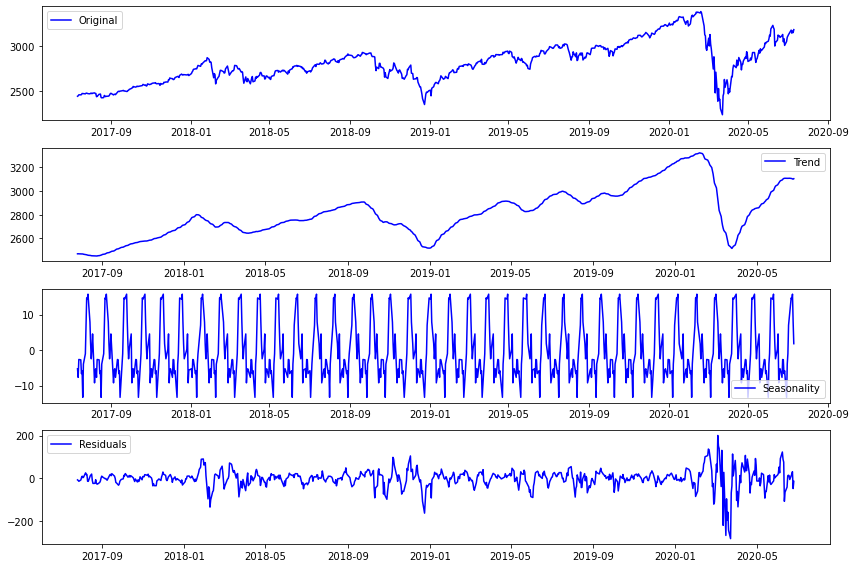

In [50]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [51]:
residual.dropna(inplace=True)

In [52]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -8.434624e+00
p-value                        1.830828e-13
#Lags Used                     1.700000e+01
Number of Observations Used    7.170000e+02
Critical Value (1%)           -3.439503e+00
Critical Value (5%)           -2.865579e+00
Critical Value (10%)          -2.568921e+00
dtype: float64


### A.3) Frequency Set To 253 periods

In [53]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='additive', period = 253)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

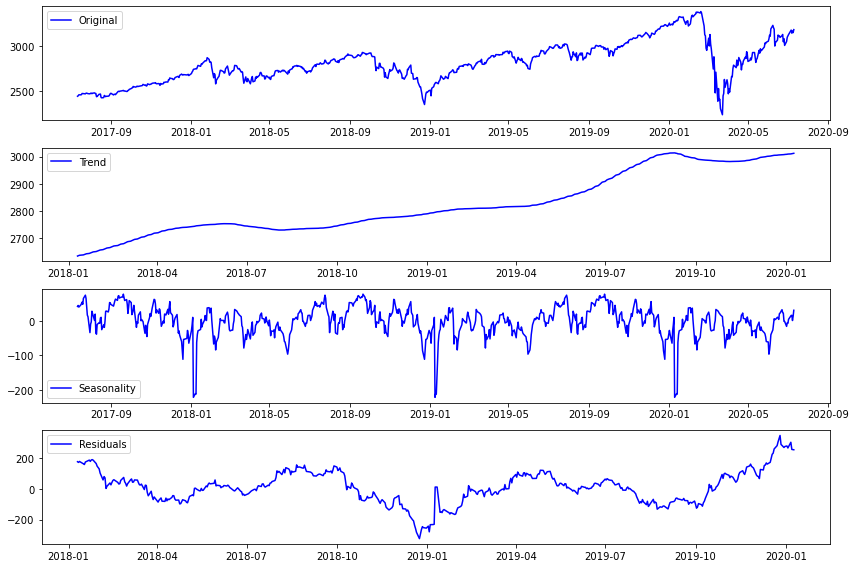

In [54]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [55]:
residual.dropna(inplace=True)

In [56]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -2.567859
p-value                          0.099824
#Lags Used                       9.000000
Number of Observations Used    493.000000
Critical Value (1%)             -3.443684
Critical Value (5%)             -2.867420
Critical Value (10%)            -2.569902
dtype: float64


## B) Multiplicative Decomposition

### B.1) Frequency Set To 7 periods

In [69]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='multiplicative', period = 5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

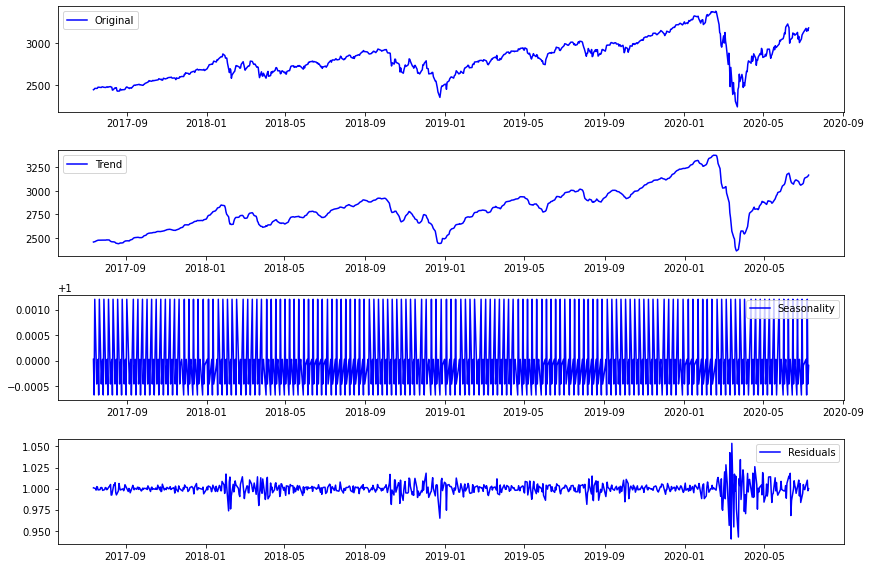

In [70]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [71]:
residual.dropna(inplace=True)

In [72]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.114429e+01
p-value                        3.053408e-20
#Lags Used                     1.400000e+01
Number of Observations Used    7.360000e+02
Critical Value (1%)           -3.439266e+00
Critical Value (5%)           -2.865475e+00
Critical Value (10%)          -2.568865e+00
dtype: float64


### B.2) Frequency Set To 20 periods

In [61]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='multiplicative', period = 20)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

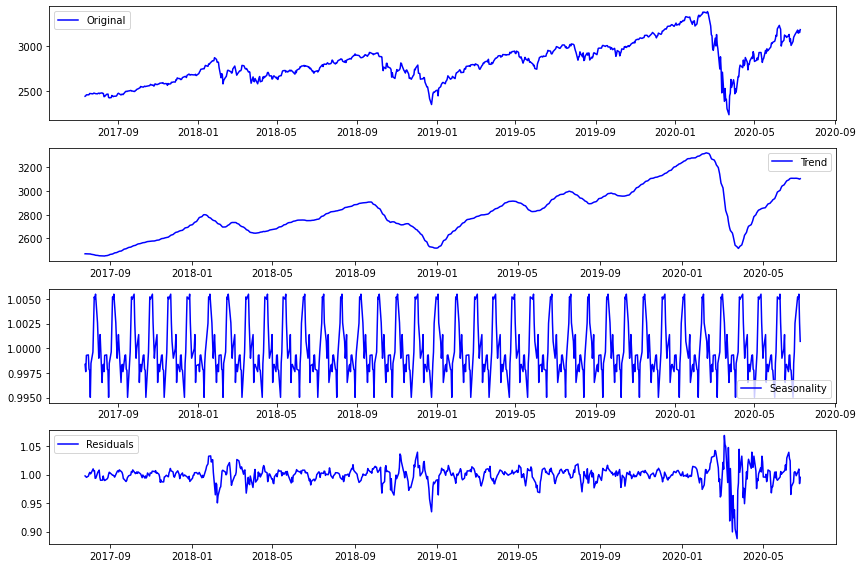

In [62]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [63]:
residual.dropna(inplace=True)

In [64]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -8.526575e+00
p-value                        1.065190e-13
#Lags Used                     1.700000e+01
Number of Observations Used    7.170000e+02
Critical Value (1%)           -3.439503e+00
Critical Value (5%)           -2.865579e+00
Critical Value (10%)          -2.568921e+00
dtype: float64


### B.3) Frequency Set To 253 periods

In [65]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='multiplicative', period = 253)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

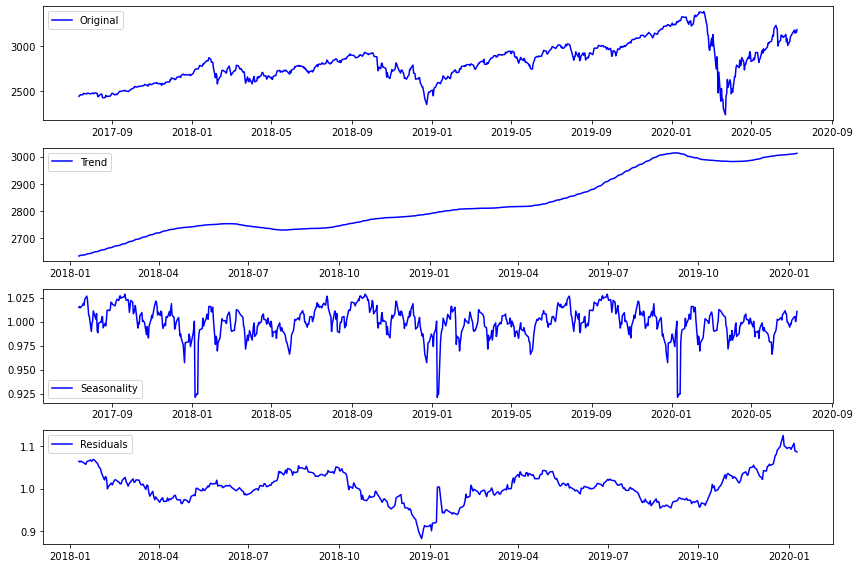

In [66]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [67]:
residual.dropna(inplace=True)

In [68]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -2.674773
p-value                          0.078506
#Lags Used                       9.000000
Number of Observations Used    493.000000
Critical Value (1%)             -3.443684
Critical Value (5%)             -2.867420
Critical Value (10%)            -2.569902
dtype: float64


In [73]:
# The S&P 500 company ticker is ^GSPC

# Obtain the price info
inx_info = retrieve_ticker_price_info('^GSPC', five_years_ago)

# Create and view the dataframe
inx_df = retrieve_price_history_dataframe('^GSPC', inx_info)
inx_df.head()

volume     high      low  adj_close    close     open
date                                                                 
2015-07-13  3096730000  2100.67  2080.03    2099.60  2099.60  2080.03
2015-07-14  3002120000  2111.98  2098.18    2108.95  2108.95  2099.72
2015-07-15  3261810000  2114.14  2102.49    2107.40  2107.40  2109.01
2015-07-16  3227080000  2124.42  2110.55    2124.29  2124.29  2110.55
2015-07-17  3362750000  2128.91  2119.88    2126.64  2126.64  2126.80

In [74]:
# View the S&P 500
print_ohlc(inx_df, inx_info)